In [1]:
#librarys
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
#functions used by this script
%run ./ChiQuad.ipynb

# Name of the file to plot

In [3]:
#call chiquadfunc
values = data("1253.txt")

53634.2
<ValueView of Minuit at 3021490>
  t0: 53628.857732842946
  x0: 1.567634910770721e-09
  x1: -0.9245785254495258
  x2: 0.41843058651339615


## function returns

In [4]:
#chiquad over degree of freedom
chiquaddof = values[0]

In [5]:
print(chiquaddof)

4.521554220496801


In [6]:
#values fitted
fitvalues =  values[1]

In [7]:
#non repeated bands
nonbands = values[2]

In [8]:
#template functions
tpfun = values[3]

In [9]:
#bands
bands = values[4]

In [10]:
#data time, flux and flux error
xx = values[5]
zz = values[6]
ezz = values[7]

In [11]:
redshift = values[8]

# Plot data def function

In [12]:
#function that will return plot data according to band
def plot(band):

    x_gr = np.linspace(-10, 50, 60 + 1)
    
    #band index
    bandindex = [j for j, e in enumerate(nonbands) if e == band]
    
    #template list data plot
    x_plot = []
    z_plot = []
    for i in range(0,len(x_gr)):

        x_plot.append(x_gr[i])
        z_plot.append(fitvalues[1]*(tpfun[bandindex[0]][0](x_gr[i]) + fitvalues[2]*tpfun[bandindex[0]][1](x_gr[i]) + fitvalues[3]*tpfun[bandindex[0]][2](x_gr[i]))*((1+redshift)))

    #real data lists plot
    x_plot_dat = []
    z_plot_dat = []
    z_error_plot_dat = []

    for i in range(0,len(xx)):

        if bands[i] == band:

            x_plot_dat.append(xx[i]-fitvalues[0])
            z_plot_dat.append(zz[i])
            z_error_plot_dat.append(ezz[i])
    
    #return template data points and real data plot points
    return x_plot, z_plot, x_plot_dat, z_plot_dat, z_error_plot_dat

# Choose a band to plot:

In [13]:
#dataplotsdssu = plot("sdssu")
dataplotsdssg = plot("sdssg")
dataplotsdssr = plot("sdssr")
dataplotsdssi = plot("sdssi")

<IPython.core.display.Javascript object>


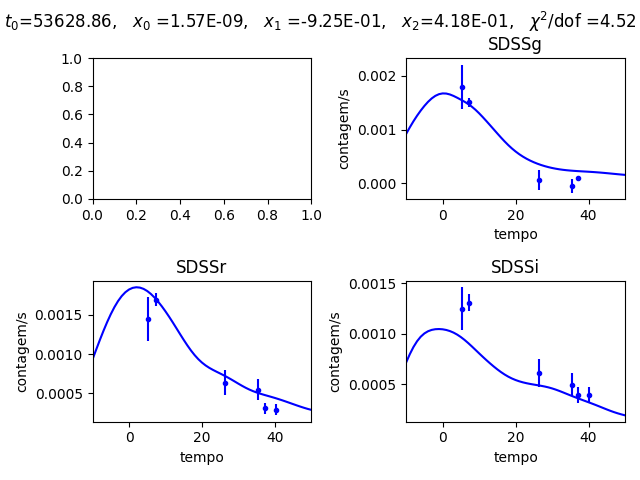

In [14]:
%matplotlib notebook

figure, axes = plt.subplots(nrows=2, ncols=2)
figure.subplots_adjust(top=0.8)


#plt.subplot(2, 1, 1)
'''
axes[0, 0].set_title('SDSSu')
axes[0, 0].plot(dataplotsdssu[0], dataplotsdssu[1], 'b')
axes[0, 0].errorbar(dataplotsdssu[2], dataplotsdssu[3], yerr=dataplotsdssu[4], fmt='b.')
axes[0, 0].set_xlim([-10, 50])
axes[0, 0].set_xlabel("tempo")
axes[0, 0].set_ylabel("contagem/s")
'''
#plt.subplot(2, 1, 2)
axes[0, 1].set_title("\n"+'SDSSg')
axes[0, 1].plot(dataplotsdssg[0], dataplotsdssg[1], 'b')
axes[0, 1].errorbar(dataplotsdssg[2], dataplotsdssg[3], yerr=dataplotsdssg[4], fmt='b.')
axes[0, 1].set_xlim([-10, 50])
axes[0, 1].set_xlabel("tempo")
axes[0, 1].set_ylabel("contagem/s")

axes[1, 0].set_title("\n"+'SDSSr')
axes[1, 0].plot(dataplotsdssr[0], dataplotsdssr[1], 'b')
axes[1, 0].errorbar(dataplotsdssr[2], dataplotsdssr[3], yerr=dataplotsdssr[4], fmt='b.')
axes[1, 0].set_xlim([-10, 50])
axes[1, 0].set_xlabel("tempo")
axes[1, 0].set_ylabel("contagem/s")

axes[1, 1].set_title('SDSSi')
axes[1, 1].plot(dataplotsdssi[0], dataplotsdssi[1], 'b')
axes[1, 1].errorbar(dataplotsdssi[2], dataplotsdssi[3], yerr=dataplotsdssi[4], fmt='b.')
axes[1, 1].set_xlim([-10, 50])
axes[1, 1].set_xlabel("tempo")
axes[1, 1].set_ylabel("contagem/s")

figure.suptitle("$t_0$=" + '%.2f' % fitvalues[0] +",   $x_0$ =" +  '%.2E' % Decimal(fitvalues[1]) + ",   $x_1$ =" + '%.2E' % Decimal(fitvalues[2]) + ",   $x_2$=" + '%.2E' % Decimal(fitvalues[3]) + ",   $χ^2/$dof =" + '%.2f' % chiquaddof,y=0.98)

figure.tight_layout()

figure.show()

In [15]:
fitvalues

<ValueView of Minuit at 3021490>
  t0: 53628.857732842946
  x0: 1.567634910770721e-09
  x1: -0.9245785254495258
  x2: 0.41843058651339615